Importing Numpy, Pandas, Matplotlib Pyplot, Seaborn

In [100]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import numpy as np
import seaborn as sn

Creating DataFrame

In [101]:
IPO_df = pd.read_excel('D:/Initial Public Offering.xlsx')

print(IPO_df.head(5))

        Date                                   IPO_Name  Issue_Size(crores)  \
0 2025-08-06                      M & B Engineering Ltd              650.00   
1 2025-08-06          Sri Lotus Developers & Realty Ltd              792.00   
2 2025-08-06  National Securities Depository Ltd (NSDL)             4011.60   
3 2025-08-05                        Aditya Infotech Ltd             1300.00   
4 2025-08-05                    Laxmi India Finance Ltd              254.26   

      QIB    HNI    RII   Total  Offer Price  List Price  Listing Gain  ...  \
0   36.72  38.24  32.55   36.20          385       386.0          0.26  ...   
1  163.90  57.71  20.28   69.14          150       179.1         19.40  ...   
2  103.97  34.98   7.73   41.01          800       880.0         10.00  ...   
3  133.21  72.00  50.87  100.69          675      1018.0         50.81  ...   
4    1.30   1.84   2.22    1.87          158       136.0        -13.92  ...   

   CMP(NSE)  Current Gains  Unnamed: 13  Unnamed: 

How many missing values are present in each column, and how should they be handled?


In [102]:
print(IPO_df.isnull().sum())
IPO_df = IPO_df.dropna(axis=1, how='all')
IPO_df = IPO_df.drop(['Unnamed: 20'], axis=1)
IPO_df = IPO_df.fillna(0)
print(IPO_df.isnull().sum())



Date                    0
IPO_Name                0
Issue_Size(crores)      0
QIB                     2
HNI                     2
RII                     2
Total                   2
Offer Price             0
List Price              0
Listing Gain            0
CMP(BSE)                2
CMP(NSE)               10
Current Gains           3
Unnamed: 13           561
Unnamed: 14           561
Unnamed: 15           561
Unnamed: 16           561
Unnamed: 17           561
Unnamed: 18           561
Unnamed: 19           561
Unnamed: 20           560
dtype: int64
Date                  0
IPO_Name              0
Issue_Size(crores)    0
QIB                   0
HNI                   0
RII                   0
Total                 0
Offer Price           0
List Price            0
Listing Gain          0
CMP(BSE)              0
CMP(NSE)              0
Current Gains         0
dtype: int64


Are there any incorrect or inconsistent data types in the dataset (e.g., numeric columns stored as strings)?


In [103]:
print(IPO_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                561 non-null    datetime64[ns]
 1   IPO_Name            561 non-null    object        
 2   Issue_Size(crores)  561 non-null    float64       
 3   QIB                 561 non-null    float64       
 4   HNI                 561 non-null    float64       
 5   RII                 561 non-null    float64       
 6   Total               561 non-null    float64       
 7   Offer Price         561 non-null    int64         
 8   List Price          561 non-null    float64       
 9   Listing Gain        561 non-null    float64       
 10  CMP(BSE)            561 non-null    float64       
 11  CMP(NSE)            561 non-null    float64       
 12  Current Gains       561 non-null    float64       
dtypes: datetime64[ns](1), float64(10), int64(1), objec

How can we calculate new columns such as Avg_CMP, Listing_Return_%, and Current_Return_%?


In [104]:
IPO_df['Avg_cmp'] = (IPO_df['CMP(BSE)'] + IPO_df['CMP(NSE)'])/2
# print(IPO_df.head(2))

IPO_df['Listing_Return_%'] = round(((IPO_df['List Price'] - IPO_df['Offer Price']) / IPO_df['Offer Price']) * 100, 2)
# print(IPO_df.head(2))

IPO_df['Current_Returns %'] = round(((IPO_df['Avg_cmp']-IPO_df['Offer Price'])/IPO_df['Offer Price'])*100, 2)
IPO_df.to_excel('IPO.xlsx')
print(IPO_df.head(2))

        Date                           IPO_Name  Issue_Size(crores)     QIB  \
0 2025-08-06              M & B Engineering Ltd               650.0   36.72   
1 2025-08-06  Sri Lotus Developers & Realty Ltd               792.0  163.90   

     HNI    RII  Total  Offer Price  List Price  Listing Gain  CMP(BSE)  \
0  38.24  32.55  36.20          385       386.0          0.26    426.85   
1  57.71  20.28  69.14          150       179.1         19.40    201.10   

   CMP(NSE)  Current Gains  Avg_cmp  Listing_Return_%  Current_Returns %  
0    426.15          10.87   426.50              0.26              10.78  
1    199.72          34.07   200.41             19.40              33.61  


How many unique IPOs are there in the dataset?


In [105]:
print(IPO_df['IPO_Name'].count())

561


What is the date range of IPOs available in the dataset?


In [106]:
IPO_df['Date'] = pd.to_datetime(IPO_df['Date'], errors='coerce')

start_date = IPO_df['Date'].min()
end_date = IPO_df['Date'].max()

print('Earliest IPO Date', start_date)
print('Latest IPO Date', end_date)

Earliest IPO Date 2010-01-04 00:00:00
Latest IPO Date 2025-08-06 00:00:00


Which IPOs had the highest and lowest listing gains?


In [107]:
highest_listing_gain = IPO_df['Listing Gain'].max()
lowest_listing_gain = IPO_df[IPO_df['Listing Gain']>0]['Listing Gain'].min()

print('Highest Listing Gain Is:', highest_listing_gain)
print('Lowest Listing Gain Is: ', lowest_listing_gain)

Highest Listing Gain Is: 252.76
Lowest Listing Gain Is:  0.02


Which IPOs had the highest and lowest current gains?


In [108]:
highest_current_gain = IPO_df['Current Gains'].max()
lowest_current_gain = IPO_df[IPO_df['Current Gains']>0]['Current Gains'].min()

print('Highet_Current_Gain:', highest_current_gain)
print('Highest_Current_Gain: ', lowest_current_gain)

Highet_Current_Gain: 2523.67
Highest_Current_Gain:  0.13


Is there a correlation between subscription levels (QIB, HNI, RII) and listing gains?


                   QIB       HNI       RII  Listing Gain
QIB           1.000000  0.613963  0.438198      0.622133
HNI           0.613963  1.000000  0.542704      0.629242
RII           0.438198  0.542704  1.000000      0.516083
Listing Gain  0.622133  0.629242  0.516083      1.000000


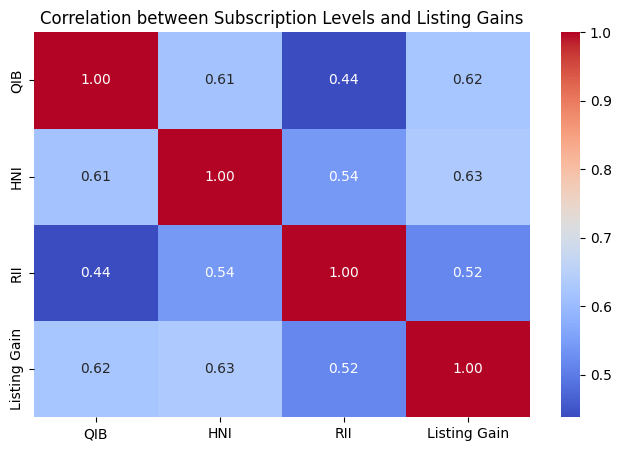

In [109]:
col_of_interest = ['QIB', 'HNI', 'RII', 'Listing Gain']
subset_df = IPO_df[col_of_interest]

correlation_matrix = subset_df.corr()
correlation_matrix.to_excel('Correlation between subscription Levels and Listing Gains.xlsx')
print(correlation_matrix)


# +1 → Strong positive correlation
# 0 → No correlation
# -1 → Strong negative correlation

plt.figure(figsize=(8,5))
sn.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation between Subscription Levels and Listing Gains")
plt.savefig('Correlation between subscription Levels and Listing Gains.png')
plt.show()


Does a higher total subscription ratio lead to a higher listing gain?


In [110]:
IPO_df['Total_Subscription'] = IPO_df[['QIB', 'HNI', 'RII']].mean(axis=1)

correlation = IPO_df['Total_Subscription'].corr(IPO_df['Listing_Return_%'])

print('Correlation Between Total Subscription and Listing Gain (%):', correlation)

# > 0.7 → Strong positive relationship (higher subscription → higher gain)
# 0.3–0.7 → Moderate positive relationship
# < 0.3 → Weak or no correlation

Correlation Between Total Subscription and Listing Gain (%): 0.702286282824258


How does issue size relate to IPO performance (listing and current gains)?


In [111]:
correlation_listing = IPO_df['Issue_Size(crores)'].corr(IPO_df['Listing_Return_%'])
correlation_current = IPO_df['Issue_Size(crores)'].corr(IPO_df['Current_Returns %'])

print('Correlation between issue size and Listing Gain(%): ', correlation_listing)
print('Correlation between issue size and Current Gain(%): ', correlation_current)

# Negative correlation (e.g., -0.45): Smaller IPOs tend to give higher gains.
# Positive correlation (e.g., +0.30): Larger IPOs perform better.
# Near 0: No clear pattern between size and performance

Correlation between issue size and Listing Gain(%):  -0.09343156555858793
Correlation between issue size and Current Gain(%):  -0.032754064768074416


How have IPO listing gains changed over time (monthly or yearly trend)?


    Year  Listing_Return_%
0   2010         10.229054
1   2011          3.181795
2   2012          5.312727
3   2013          4.500000
4   2014         25.126667
5   2015          6.548500
6   2016         12.351481
7   2017         21.475526
8   2018          5.255833
9   2019         14.575882
10  2020         38.716250
11  2021         30.942769
12  2022         10.252821
13  2023         26.066500
14  2024         28.377439
15  2025         11.034359


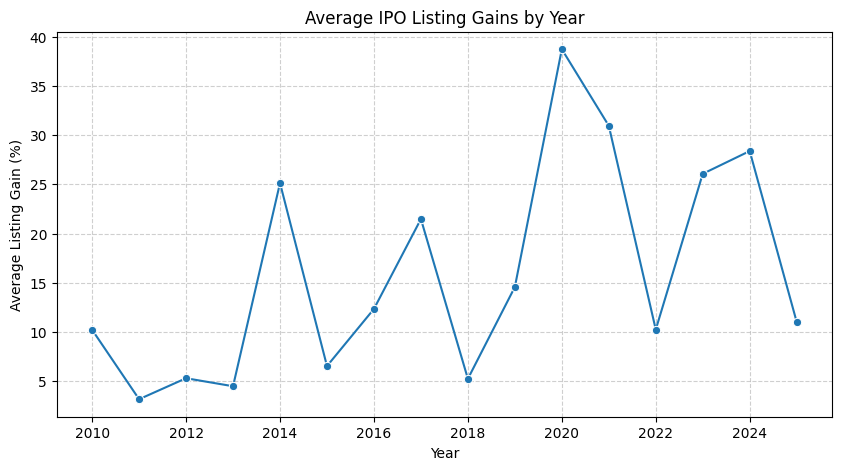

In [112]:
IPO_df['Date'] = pd.to_datetime(IPO_df['Date'], errors='coerce')

IPO_df['Year'] = IPO_df['Date'].dt.year
IPO_df['Month'] = IPO_df['Date'].dt.month

yearly_trend = IPO_df.groupby('Year')['Listing_Return_%'].mean().reset_index()
yearly_trend.to_excel('Yearly_trend of Listing Return.xlsx')
print(yearly_trend)

plt.figure(figsize=(10,5))
sn.lineplot(data=yearly_trend, x='Year', y='Listing_Return_%', marker='o')
plt.title("Average IPO Listing Gains by Year")
plt.ylabel("Average Listing Gain (%)")
plt.xlabel("Year")
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('Yearly_trend of Listing Return')
plt.show()



Which months or quarters tend to have higher average listing gains?


    Month  Listing Gain
6       7         26.79
11     12         24.85
10     11         23.50
8       9         23.48
9      10         17.67
2       3         17.13
0       1         16.12
7       8         15.72
1       2         13.15
5       6         12.12
3       4          8.18
4       5          4.29


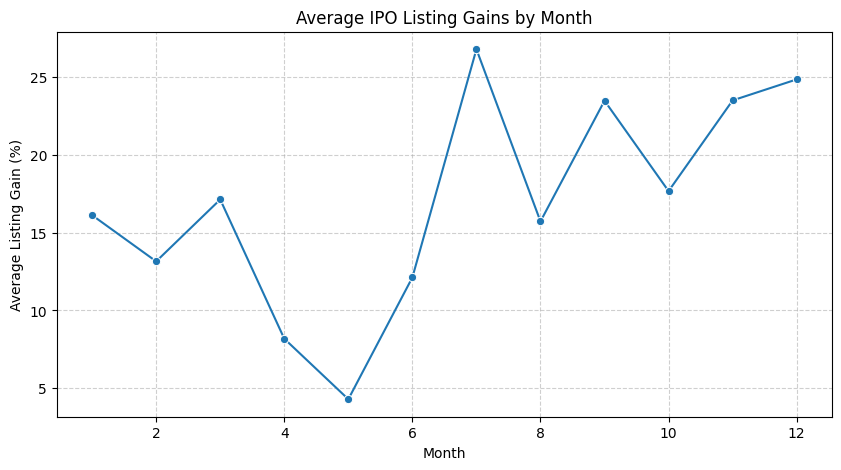

   Quarter  Listing Gain
3        4         22.08
2        3         21.98
0        1         15.42
1        2          7.38


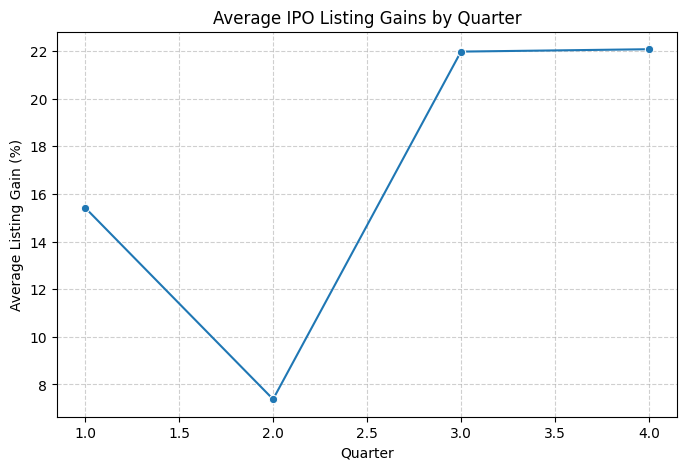

In [113]:
# Convert Date column
IPO_df['Date'] = pd.to_datetime(IPO_df['Date'], errors='coerce')

# Extract month and quarter
IPO_df['Month'] = IPO_df['Date'].dt.month
IPO_df['Quarter'] = IPO_df['Date'].dt.quarter

# === MONTHLY AVERAGE LISTING GAIN ===
month_higher_avg_listing_gain = (
    IPO_df.groupby('Month')['Listing Gain']
    .mean()
    .round(2)
    .reset_index()
    .sort_values(by='Listing Gain', ascending=False)
)

# Save to Excel
month_higher_avg_listing_gain.to_excel('Month_Higher_Avg_Listing_Gain.xlsx', index=False)

# Print results
print(month_higher_avg_listing_gain)

# Plot
plt.figure(figsize=(10,5))
sn.lineplot(data=month_higher_avg_listing_gain, x='Month', y='Listing Gain', marker='o')
plt.title("Average IPO Listing Gains by Month")
plt.ylabel("Average Listing Gain (%)")
plt.xlabel("Month")
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('Month_Higher_Avg_Listing_Gain.png')
plt.show()


# === QUARTERLY AVERAGE LISTING GAIN ===
quarter_higher_avg_listing_gain = (
    IPO_df.groupby('Quarter')['Listing Gain']
    .mean()
    .round(2)
    .reset_index()
    .sort_values(by='Listing Gain', ascending=False)
)

# Save to Excel
quarter_higher_avg_listing_gain.to_excel('Quarter_Higher_Avg_Listing_Gain.xlsx', index=False)

# Print results
print(quarter_higher_avg_listing_gain)

# Plot
plt.figure(figsize=(8,5))
sn.lineplot(data=quarter_higher_avg_listing_gain, x='Quarter', y='Listing Gain', marker='o')
plt.title("Average IPO Listing Gains by Quarter")
plt.ylabel("Average Listing Gain (%)")
plt.xlabel("Quarter")
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('Quarter_Higher_Avg_Listing_Gain.png')
plt.show()


Do smaller IPOs generally yield higher returns than larger IPOs?


In [114]:
IPO_df['Size_Category'] = pd.cut(
    IPO_df['Issue_Size(crores)'],
    bins=[0, 500, 2000, 10000, IPO_df['Issue_Size(crores)'].max()],
    labels=['Small', 'Medium', 'Large', 'Mega']
)

avg_returns_by_size = IPO_df.groupby('Size_Category')[['Listing Gain', 'Current Gains']].mean().round(2)
avg_returns_by_size.to_excel('Avg Return by Issue Size of IPO.xlsx')
print(avg_returns_by_size)


               Listing Gain  Current Gains
Size_Category                             
Small                 19.32          68.67
Medium                18.89         106.23
Large                 13.87          72.78
Mega                   0.87          -1.23


C:\Users\kasif\AppData\Local\Temp\ipykernel_27884\2458613969.py:7: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Which IPOs performed best immediately after listing but failed to sustain performance later?


In [115]:
listing_threshold = IPO_df['Listing_Return_%'].quantile(0.75)

underperforming_ipos = IPO_df[
    (IPO_df['Listing_Return_%']>=listing_threshold) &
    (IPO_df['Current Gains']<=0)
]

underperforming_ipos = underperforming_ipos[['IPO_Name', 'Listing_Return_%', 'Current Gains']]
underperforming_IPOs = underperforming_ipos.sort_values(by='Listing_Return_%', ascending=False)
print(underperforming_IPOs.head())



                              IPO_Name  Listing_Return_%  Current Gains
238         Sigachi Industries Limited            252.76         -80.60
364     Salasar Techno Engineering Ltd            139.95         -93.47
342      Astron Paper & Board Mill Ltd            128.00         -70.50
294   Chemcon Speciality Chemicals Ltd            114.99         -31.78
256  Tatva Chintan Pharma Chem Limited             95.00          -4.32


What percentage of IPOs currently trade below their offer price?


In [116]:
underperforming_count = IPO_df[IPO_df['Avg_cmp']< IPO_df['Offer Price']].shape[0]
total_IPOs = IPO_df.shape[0]

percentage_underperfroming = (underperforming_count/total_IPOs)*100
print(f'Percentage of IPOs trading below offer Price: { percentage_underperfroming: 2f}%')

Percentage of IPOs trading below offer Price:  43.493761%


How does QIB, HNI, or RII participation individually affect IPO performance?


In [117]:
cols = ['QIB', 'HNI', 'RII','Listing Gain', 'Current Gains']
subset = IPO_df[cols]

correlation_matrix = subset.corr()
print(correlation_matrix[['Listing Gain', 'Current Gains']])

# Values close to +1 → strong positive influence
# Values close to 0 → little influence
# Values close to -1 → negative influence

               Listing Gain  Current Gains
QIB                0.622133       0.065639
HNI                0.629242       0.117428
RII                0.516083      -0.040778
Listing Gain       1.000000       0.062998
Current Gains      0.062998       1.000000


Are there any outlier IPOs with extremely high or low listing gains?


In [118]:
Q1 = IPO_df['Listing_Return_%'].quantile(0.25)
Q3 = IPO_df['Listing_Return_%'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
outliers = IPO_df[(IPO_df['Listing_Return_%'] < lower_bound) | (IPO_df['Listing_Return_%'] > upper_bound)]
print(outliers[['IPO_Name', 'Listing_Return_%', 'Current_Returns %']].head())


                                        IPO_Name  Listing_Return_%  \
39   Unimech Aerospace and Manufacturing Limited             89.94   
45                      Mamata Machinery Limited            146.91   
64                       Waaree Energies Limited             69.66   
68  KRN Heat Exchanger and Refrigeration Limited            113.64   
73                  P N Gadgil Jewellers Limited             73.75   

    Current_Returns %  
39              39.93  
45              74.03  
64             110.69  
68             314.15  
73              15.33  


What is the overall distribution of listing gains across all IPOs (normal, skewed, etc.)?


In [119]:
Listing_Stats = IPO_df['Listing Gain'].describe()
# print(Listing_Stats)

skewness = IPO_df['Listing Gain'].skew()
kurtosis = IPO_df['Listing Gain'].kurt()

print(f'Skewness:{skewness:.2f}')
print(f'Kurtosis:{kurtosis:.2f}')

# Skewness > 0 → right-skewed (a few IPOs have large positive gains).
# Skewness < 0 → left-skewed (a few IPOs have large losses).
# Kurtosis > 3 → heavy tails (many extreme values).
# Kurtosis ≈ 0–3 → close to normal distribution.

Skewness:2.54
Kurtosis:9.31


What is the average listing gain percentage vs current gain percentage across the dataset?


In [120]:
avg_listing_gain = IPO_df['Listing Gain'].mean()
avg_current_gain = IPO_df['Current Gains'].mean()

print(f'Average Listing Gain (%):{avg_listing_gain:.2f}')
print(f'Average Current Gain (%):{avg_current_gain:.2f}')


Average Listing Gain (%):18.03
Average Current Gain (%):83.35


How has investor sentiment changed over time based on IPO oversubscription patterns?


In [121]:
IPO_df['Date'] = pd.to_datetime(IPO_df['Date'], errors='coerce')
IPO_df['Year'] = IPO_df['Date'].dt.year

avg_subs_trend = (
    IPO_df.groupby('Year')[['QIB', 'HNI', 'RII', 'Total']]
    .mean()
    .round(2)
    .reset_index()
)

print(avg_subs_trend)

    Year    QIB     HNI    RII  Total
0   2010  18.77   33.48   6.84  16.18
1   2011   2.31    7.16   4.69   3.89
2   2012  11.53   27.31   3.96  10.97
3   2013  32.73   16.10   2.90  19.82
4   2014  18.14  108.06  12.07  31.06
5   2015  17.19   35.88   1.89  13.25
6   2016  25.48   89.18   4.91  30.13
7   2017  43.73  119.15   9.05  43.88
8   2018  31.67   81.33   4.75  27.76
9   2019  29.54   85.46   9.19  34.01
10  2020  55.64  190.51  18.99  66.07
11  2021  57.62  139.16  21.99  58.76
12  2022  32.48   11.58   6.60  13.89
13  2023  77.72   46.69  23.23  42.32
14  2024  84.58   95.35  32.56  60.69
15  2025  83.02   96.34  32.63  60.02


Can we create an interactive chart showing subscription vs listing gain?


In [144]:
cols = ['IPO_Name', 'QIB', 'HNI', 'RII', 'Issue_Size(crores)', 'Listing_Return_%']
IPO_df_subset = IPO_df[cols].dropna()

import plotly.express as px

fig = px.scatter(
    IPO_df_subset,
    x='Issue_Size(crores)',
    y='Listing_Return_%',
    size='Issue_Size(crores)',        # bubble size (optional)
    color='QIB',                      # color by QIB subscription
    hover_name='IPO_Name',            # show IPO name on hover
    title='IPO Oversubscription vs Listing Gain (%)',
    labels={'Total': 'Total Subscription (x times)', 'Listing_Return_%': 'Listing Gain (%)'},
)

fig.update_layout(
    template='plotly_white',
    title_font=dict(size=20),
    xaxis=dict(showgrid=True),
    yaxis=dict(showgrid=True),
)
fig.write_image('IPO Oversubscription VS Listing Gain(%).png')
fig.show()

Which visualization best compares top 10 IPOs by listing gain?


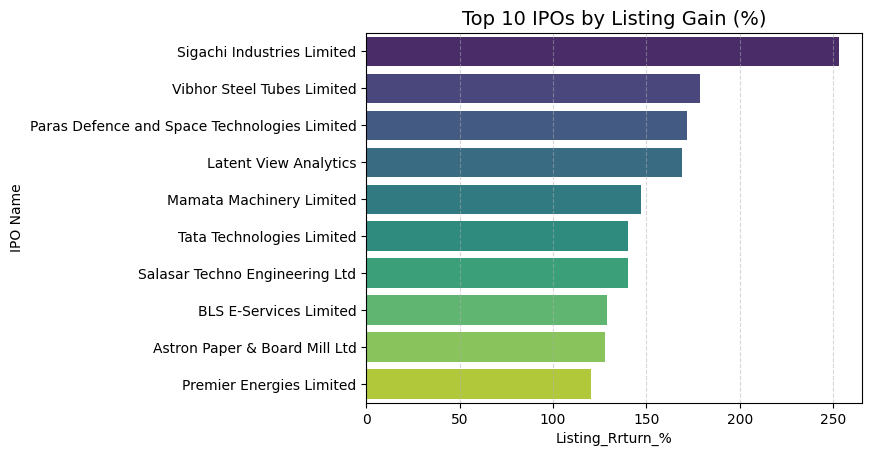

In [123]:
top10_listing = IPO_df.nlargest(10, 'Listing_Return_%')[['IPO_Name', 'Listing_Return_%']]
plt.Figure(figsize=(10,6))
sn.barplot(data=top10_listing,
           y='IPO_Name',
           x='Listing_Return_%',
           palette='viridis',
           legend=False,
           hue='IPO_Name')

plt.title('Top 10 IPOs by Listing Gain (%)', fontsize=14)
plt.xlabel('Listing_Rrturn_%')
plt.ylabel('IPO Name')
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.savefig('Top 10 IPOs by Listing Gain (%).png',)
plt.show()


Can we build a filter-based dashboard where users can view IPOs by year, issue size, or gain range?


In [124]:
import streamlit as st
import plotly.express as px


# Ensure proper datetime format
IPO_df['Date'] = pd.to_datetime(IPO_df['Date'], errors='coerce')
IPO_df['Year'] = IPO_df['Date'].dt.year

st.sidebar.header("📊 Filter IPOs")

# Filter 1: Year
years = sorted(IPO_df['Year'].dropna().unique())
selected_year = st.sidebar.multiselect("Select Year(s):", years, default=years)

# Filter 2: Issue Size Range
min_issue, max_issue = int(IPO_df['Issue_Size(crores)'].min()), int(IPO_df['Issue_Size(crores)'].max())
issue_range = st.sidebar.slider("Issue Size (₹ Cr):", min_issue, max_issue, (min_issue, max_issue))

# Filter 3: Listing Gain %
min_gain, max_gain = int(IPO_df['Listing_Return_%'].min()), int(IPO_df['Listing_Return_%'].max())
gain_range = st.sidebar.slider("Listing Gain Range (%):", min_gain, max_gain, (min_gain, max_gain))

filtered_df = IPO_df[
    (IPO_df['Year'].isin(selected_year)) &
    (IPO_df['Issue_Size(crores)'].between(issue_range[0], issue_range[1])) &
    (IPO_df['Listing_Return_%'].between(gain_range[0], gain_range[1]))
]

st.markdown("### 🧭 Key Performance Indicators")

col1, col2, col3 = st.columns(3)
col1.metric("Total IPOs", len(filtered_df))
col2.metric("Avg Listing Gain (%)", round(filtered_df['Listing_Return_%'].mean(), 2))
col3.metric("Avg Current Gain (%)", round(filtered_df['Current Gains'].mean(), 2))

fig1 = px.scatter(
    filtered_df, 
    x='Issue_Size(crores)', 
    y='Listing_Return_%',
    color='Year',
    hover_data=['IPO_Name'],
    title="Issue Size vs Listing Gain"
)
st.plotly_chart(fig1, use_container_width=True)


top10 = filtered_df.nlargest(10, 'Listing_Return_%')
fig2 = px.bar(
    top10, 
    x='Listing_Return_%', 
    y='IPO_Name', 
    orientation='h',
    color='Listing_Return_%',
    title="Top 10 IPOs by Listing Gain"
)
st.plotly_chart(fig2, use_container_width=True)


st.markdown("### 📋 Filtered IPO Data")
st.dataframe(filtered_df[['Date','IPO_Name','Issue_Size(crores)','Listing_Return_%','Current Gains']])


2025-10-12 09:00:48.735 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 09:00:48.741 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 09:00:48.746 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 09:00:48.750 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 09:00:48.751 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 09:00:48.757 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 09:00:48.763 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-12 09:00:48.766 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

http://10.211.45.220:8501Can we show a comparison between offer price, list price, and current market price for each IPO?


In [125]:
IPO_df['Offer_Price'] = pd.to_numeric(IPO_df['Offer Price'], errors='coerce')
IPO_df['List Price'] = pd.to_numeric(IPO_df['List Price'], errors='coerce')
IPO_df['CMP'] = pd.to_numeric(IPO_df['CMP(BSE)'], errors='coerce')

import plotly.express as px

# Select top N IPOs to avoid clutter
top_n = 20
top_ipo_df = IPO_df.nlargest(top_n, 'Listing_Return_%')

fig = px.bar(
    top_ipo_df,
    x='IPO_Name',
    y=['Offer Price', 'List Price', 'CMP(BSE)'],
    barmode='group',
    title="Comparison Between, Offer Price, List Price, and Current Market Price",
    labels={'value':'Price (₹)', 'IPO_Name':'IPO'},
    height=500,
    color_discrete_map={
        'Offer_Price':'skyblue',
        'List Price':'orange',
        'CMP(BSE)':'green'
    }
)

fig.update_layout(xaxis_tickangle=-45)
fig.write_image('Comparison Between, Offer Price, List Price, and Current Market Price.png')
fig.show()


What kind of interactive chart can show listing vs current gains side by side for all IPOs?


In [147]:
melted_df = IPO_df.melt(
    id_vars=['IPO_Name'],
    value_vars=['Listing_Return_%', 'Current Gains'],
    var_name='Gain_Type',
    value_name='Gain'
)

top_n =20
melted_df = melted_df[melted_df['IPO_Name'].isin(
    IPO_df.nlargest(top_n, 'Listing_Return_%' )['IPO_Name']
)]

fig = px.bar(
    melted_df,
    x='IPO_Name',
    y='Gain',
    color='Gain_Type',
    barmode='group',
    title='Listing Vs Current Gains Of Top IPOs',
    labels={'Gain':'Gain(%)', 'IPO_Name':'IPO', 'Gain_Type':'Gain_Type'},
    color_discrete_map={
        'Listing_Return_%':'green',
        'Current Gains':'orange'
    }
)

fig.update_layout(xaxis_tickangle=-45, height=500)
fig.write_image('Listing Vs Current Gains Of Top IPOs.png')
fig.show()

Can we create a heatmap showing correlation between all numeric variables in the dataset?


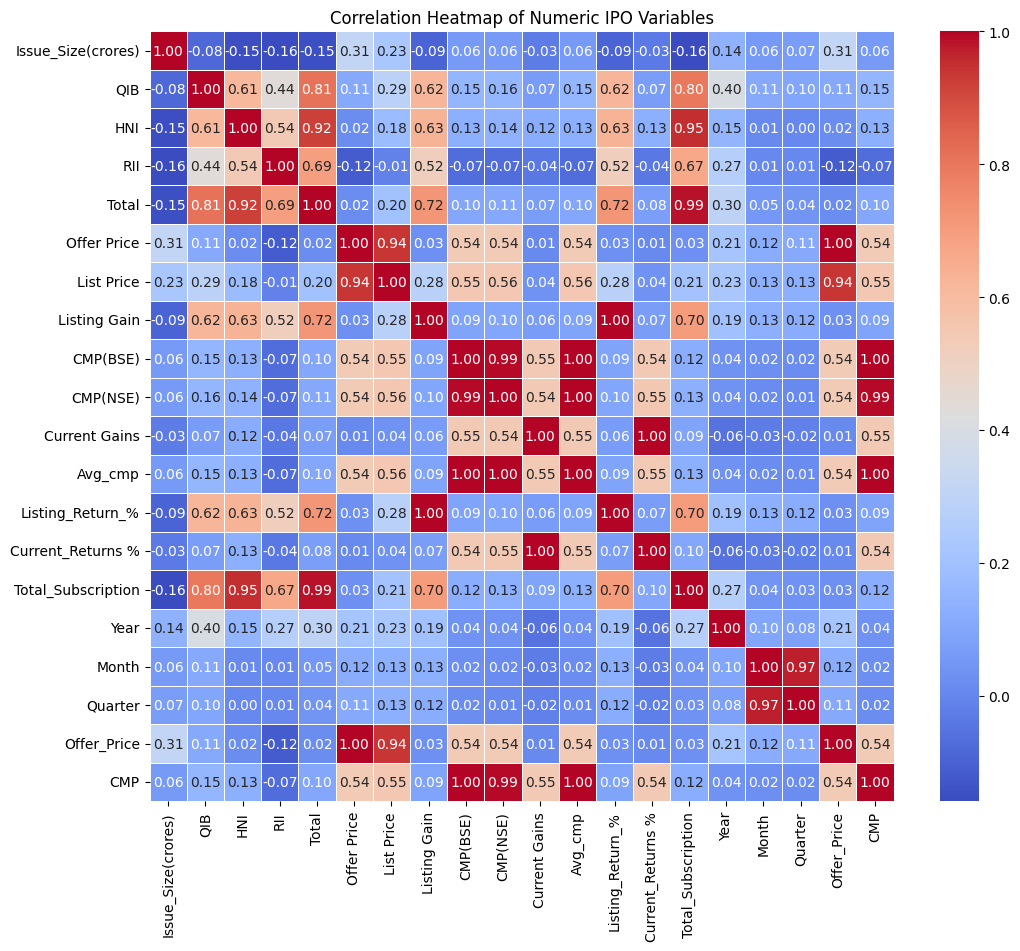

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,10))  # Increase figure size for clarity
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numeric IPO Variables")

# Save high-quality image
plt.savefig("correlation_heatmap.png", dpi=300, bbox_inches='tight')  # dpi=300 for high resolution
plt.show()


# 1 = perfect positive correlation
# -1 = perfect negative correlation
# 0 = no correlation


How can we represent the IPO success rate (profitable vs loss-making) visually?


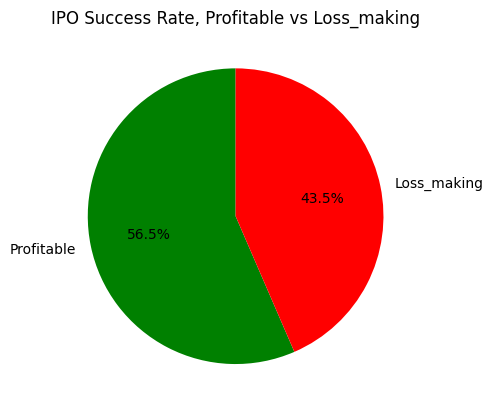

In [142]:
IPO_df['Success']= IPO_df['CMP'] >= IPO_df['Offer Price']
success_count = IPO_df['Success'].value_counts()

plt.Figure(figsize=(6,6))
plt.pie(
    success_count,
    labels=['Profitable', 'Loss_making'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['green', 'red']
)

plt.title('IPO Success Rate, Profitable vs Loss_making')
plt.savefig('IPO Success Rate,  Profitable vs Loss_making.png')
plt.show()